In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [10]:
image = cv2.imread('brain_scan.png',0)

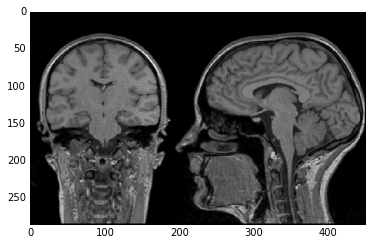

In [11]:
plt.imshow(image,"gray")
plt.show()

In [12]:
image.shape

(285, 450)

In [13]:
image = image[:,200:]

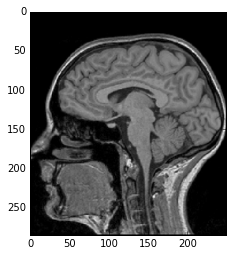

In [14]:
plt.imshow(image,"gray")
plt.show()

In [37]:
hist = cv2.equalizeHist(image)

In [38]:
retVal, thresh = cv2.threshold(hist,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

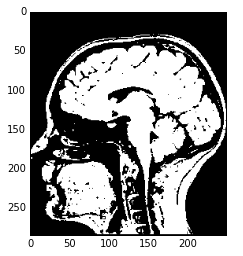

In [39]:
plt.imshow(thresh,"gray")
plt.show()

In [40]:
kernel = np.ones((5,5),np.uint8)
opened = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel)

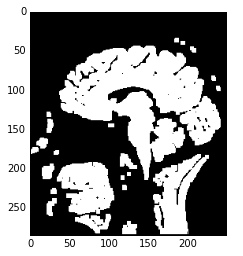

In [41]:
plt.imshow(opened,"gray")
plt.show()

In [42]:
help(cv2.connectedComponents)

Help on built-in function connectedComponents:

connectedComponents(...)
    connectedComponents(image[, labels[, connectivity[, ltype]]]) -> retval, labels



In [45]:
output = cv2.connectedComponentsWithStats(opened,4,cv2.CV_64F)


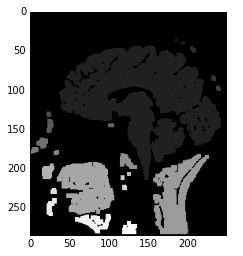

In [46]:
plt.imshow(output[1],"gray")
plt.show()

In [49]:
no_of_labels = output[0]
area_array = output[2][:,-1]

In [50]:
no_of_labels
area_array

array([44672,    35,    30, 17175,    51,    39,    38,    40,   126,
          40,   154,    74,    39,   254,  3618,  3436,   244,    25,
          30,    41,    58,   179,   607,   245], dtype=int32)

In [55]:
max_label = 2
max_area = 0
for i in range(2,no_of_labels):
    if(max_area<area_array[i]):
        max_area=area_array[i]
        max_label=i

In [56]:
extracted_image = np.zeros(output[1].shape) 

In [57]:
extracted_image[output[1]==max_label]=255

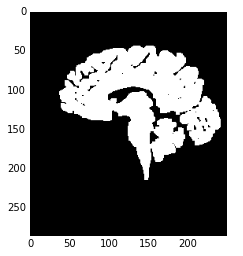

In [58]:
plt.imshow(extracted_image,"gray")
plt.show()

In [59]:
result = extracted_image*image

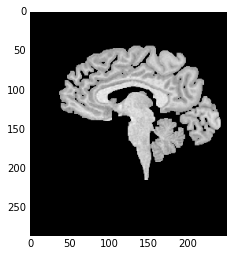

In [60]:
plt.imshow(result,"gray")
plt.show()